In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import classification_report , f1_score, roc_auc_score, confusion_matrix

In [3]:
data=pd.read_csv("Stress-Lysis.csv")

In [4]:
data.head()

,Humidity,Temperature,Step count,Stress Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Humidity      2001 non-null   float64
 1   Temperature   2001 non-null   float64
 2   Step count    2001 non-null   int64  
 3   Stress Level  2001 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 62.7 KB


In [6]:
data.describe()


,Humidity,Temperature,Step count,Stress Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [7]:
data['Stress Level'].value_counts()

Stress Level
1    790
2    710
0    501
Name: count, dtype: int64

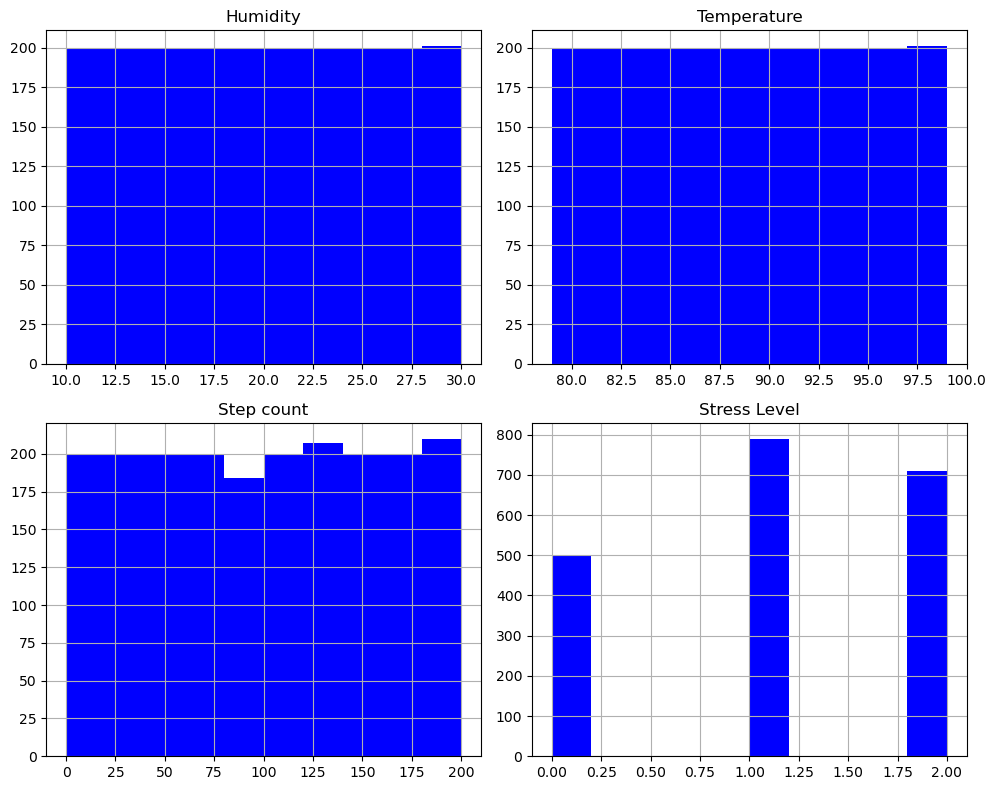

In [8]:
numerical_data = data.select_dtypes(include='number')
numerical_data.hist(figsize=(10, 8),color = 'b')
plt.tight_layout()
plt.show()

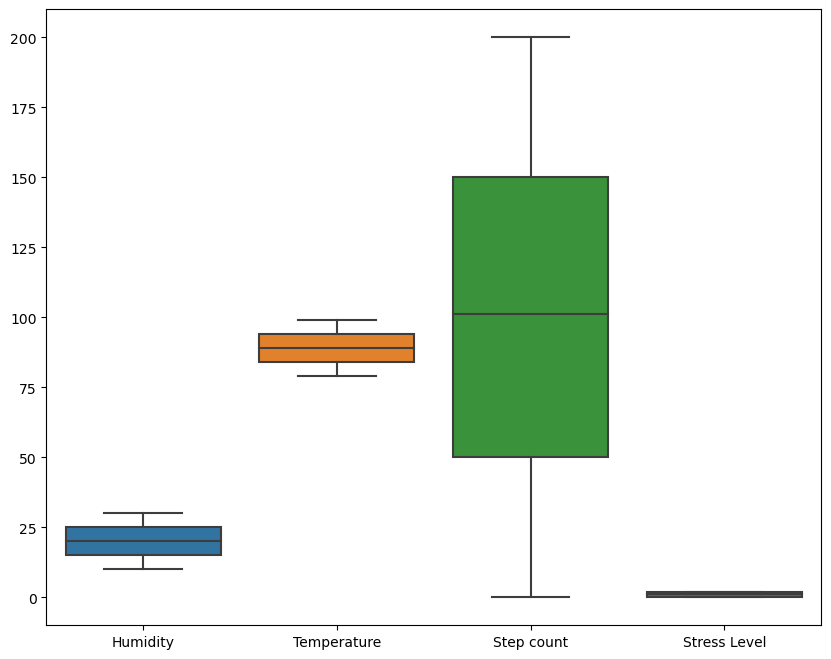

In [9]:
plt.figure(figsize=(10, 8))
sns.boxplot(numerical_data)
plt.show()

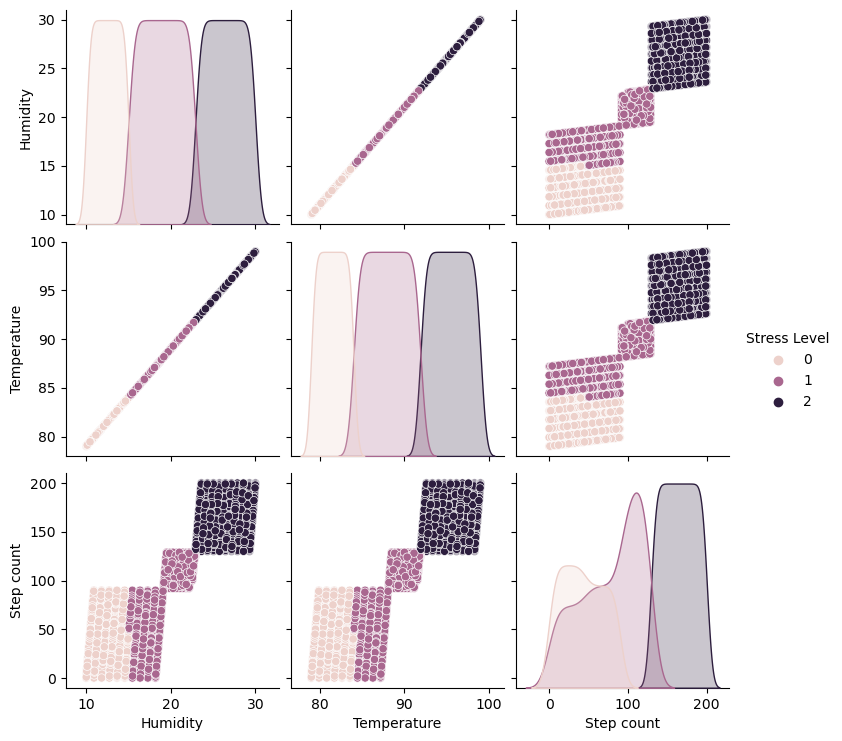

In [10]:
sns.pairplot(data, hue='Stress Level')

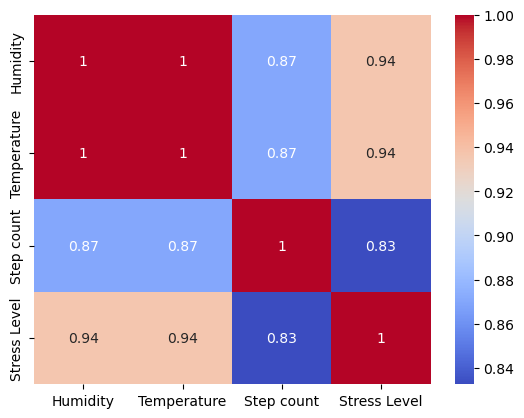

In [11]:
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [12]:
duplicate_rows = data.duplicated()
# Count of duplicate rows
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

Number of duplicate rows: 0


In [13]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Humidity,0,0.0
Temperature,0,0.0
Step count,0,0.0
Stress Level,0,0.0


In [14]:
total = data.isnull().sum().sum()
print('Total Null values =' ,total)

Total Null values = 0


In [15]:
from sklearn.model_selection import train_test_split
X = data.drop(['Stress Level'], axis=1)
Y = data['Stress Level']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=101,stratify=Y)

In [16]:
X_train.head(10)

,Humidity,Temperature,Step count
1508,17.00,86.00,63
1384,26.89,95.89,173
1011,26.18,95.18,173
637,18.80,87.80,61
706,12.51,81.51,69
1826,12.07,81.07,25
1221,23.81,92.81,149
1201,11.70,80.70,79
851,28.75,97.75,146
1946,15.89,84.89,43


In [17]:
X_test.head(10)

,Humidity,Temperature,Step count
1327,25.22,94.22,148
1246,25.69,94.69,195
820,27.55,96.55,168
1890,28.00,97.00,142
1532,27.50,96.50,163
1625,15.47,84.47,1
1277,18.56,87.56,37
1729,20.78,89.78,106
502,23.68,92.68,136
1446,13.85,82.85,21


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.select_dtypes(exclude=['object']))
X_test_scaled = scaler.transform(X_test.select_dtypes(exclude=['object']))

X_train[X_train.select_dtypes(exclude=['object']).columns] = X_train_scaled
X_test[X_test.select_dtypes(exclude=['object']).columns] = X_test_scaled

In [19]:
classifiers = [
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Support Vector Machine', SVC(random_state=42)),
    ('xgboost', xgb.XGBClassifier(tree_method="hist")),
]

Logistic Regression: Cross Val Score = 1.00
Logistic Regression: F1 Score = 1.00
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



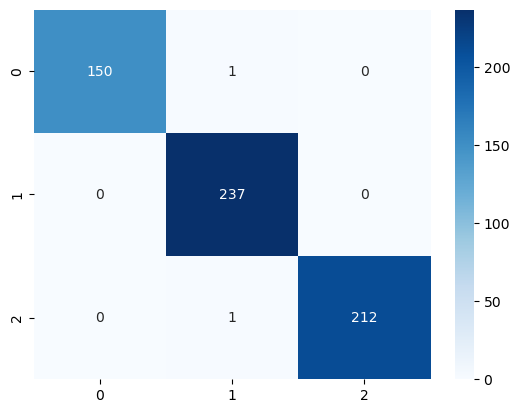

---------------------------------------------------
Random Forest: Cross Val Score = 1.00
Random Forest: F1 Score = 1.00
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



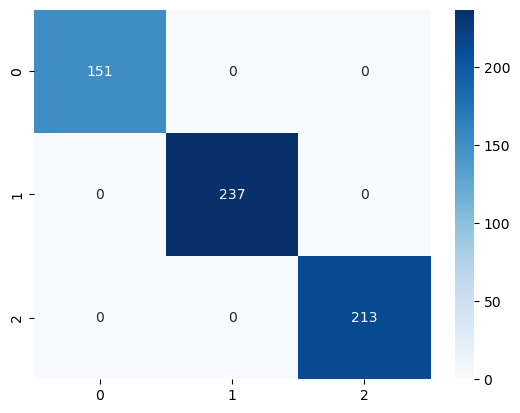

---------------------------------------------------
Gradient Boosting: Cross Val Score = 1.00
Gradient Boosting: F1 Score = 1.00
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



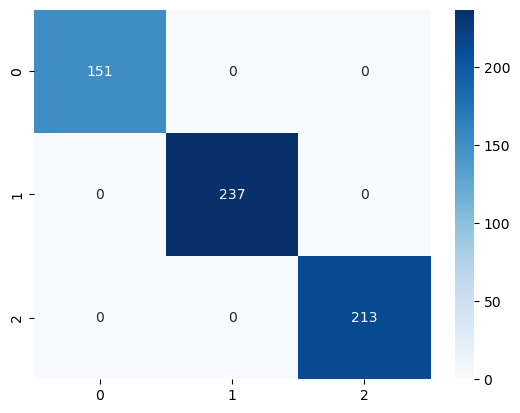

---------------------------------------------------
K-Nearest Neighbors: Cross Val Score = 1.00
K-Nearest Neighbors: F1 Score = 1.00
K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



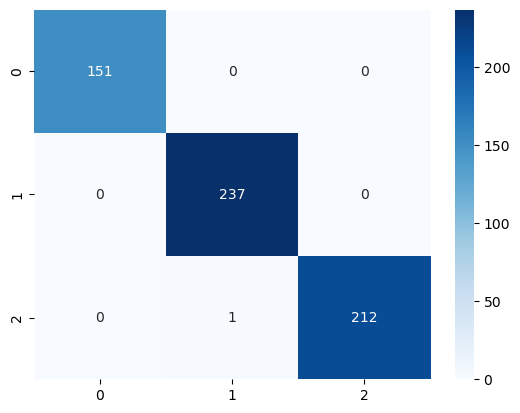

---------------------------------------------------
Support Vector Machine: Cross Val Score = 1.00
Support Vector Machine: F1 Score = 1.00
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       151
           1       0.99      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



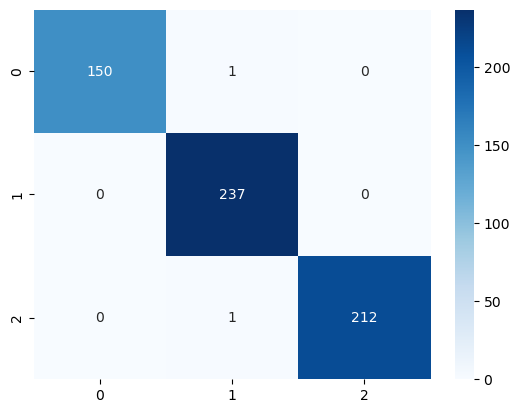

---------------------------------------------------
xgboost: Cross Val Score = 1.00
xgboost: F1 Score = 1.00
xgboost Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       151
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       213

    accuracy                           1.00       601
   macro avg       1.00      1.00      1.00       601
weighted avg       1.00      1.00      1.00       601



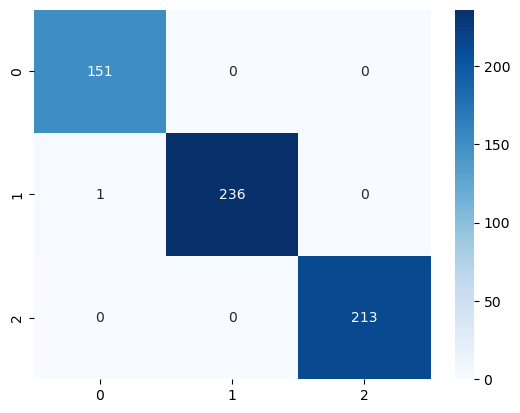

---------------------------------------------------


In [20]:
for clf_name, clf in classifiers:
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f'{clf_name}: Cross Val Score = {cv_scores.mean():.2f}')
    print(f'{clf_name}: F1 Score = {f1:.2f}')
    print(f'{clf_name} Classification Report:\n{classification_report(y_test, y_pred)}')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
    plt.show()
    print('---------------------------------------------------')

In [22]:
# List to store the performance metrics of each model
model_comparison = []

# Iterate through classifiers and store the performance metrics
for clf_name, clf in classifiers:
    # Train the model
    clf.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = clf.predict(X_test)
    
    # F1 score on the test data
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Cross-validation score
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    
    # Store the metrics in the comparison list
    model_comparison.append({
        'Model': clf_name,
        'Cross Val Score': cv_scores.mean(),
        'F1 Score': f1
    })

# Convert the model comparison list to a DataFrame for easy visualization
comparison_df = pd.DataFrame(model_comparison)

# Sort the DataFrame by F1 Score (or Cross Val Score) to find the best model
best_model = comparison_df.sort_values(by='F1 Score', ascending=False).iloc[0]

# Display the comparison table and the best model
print("Model Comparison:")
print(comparison_df)

print("\nBest Model Based on F1 Score:")
print(best_model)

Model Comparison:
                    Model  Cross Val Score  F1 Score
0     Logistic Regression         0.996429  0.996674
1           Random Forest         1.000000  1.000000
2       Gradient Boosting         1.000000  1.000000
3     K-Nearest Neighbors         0.999286  0.998336
4  Support Vector Machine         0.995714  0.996674
5                 xgboost         0.999286  0.998337

Best Model Based on F1 Score:
Model              Random Forest
Cross Val Score              1.0
F1 Score                     1.0
Name: 1, dtype: object


In [24]:
# Let's assume the best model is Random Forest
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)

# Now, let's predict the stress level for new input data
# Example input for prediction (You need to replace these with actual new data)
# The input features should match the features used during training

new_input = {
    'Humidity': [27],  # Replace value1 with actual value for Feature1
    'Temperature': [56],  # Replace value2 with actual value for Feature2
    'Step count':[193]# Add other features as needed
}

# Convert the new input into a DataFrame
new_input_df = pd.DataFrame(new_input)

# Scale the new input using the same scaler used during training
new_input_scaled = scaler.transform(new_input_df.select_dtypes(exclude=['object']))

# Make prediction using the best model
predicted_stress_level = best_model.predict(new_input_scaled)

# Output the predicted stress level
print(f"Predicted Stress Level: {predicted_stress_level[0]}")


Predicted Stress Level: 2
